In [2]:
from google.colab import files
uploaded = files.upload()

Saving sales_6.csv to sales_6.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")
import seaborn as sns

In [3]:
sales_data = pd.read_csv("sales_6.csv")
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


### 월별 게임 설치 / 플레이 횟수

In [4]:
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


In [6]:
sales_data['date'].count()
sales_data['date'].value_counts()

2022-03    50465
2022-02    49380
Name: date, dtype: int64

AttributeError: ignored

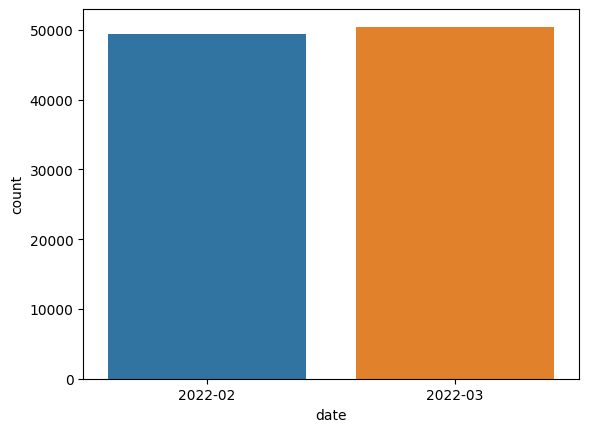

In [7]:
# 월별 고객 수 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Month')

plt.show()

In [22]:
grouped = sales_data['Status'].groupby([sales_data['date'],sales_data['Game_Name']]).count()
ax = sns.countplot(data=grouped, x='date')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Count by Game')
plt.show()

ValueError: ignored

In [11]:
sales_data['Status'].value_counts()

play       84821
install    15024
Name: Status, dtype: int64

AttributeError: ignored

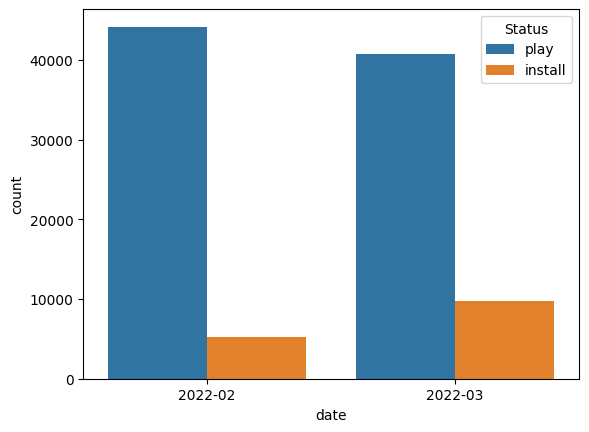

In [26]:
grouped = sales_data['Status'].groupby([sales_data['date'],sales_data['Status']]).count()
ax = sns.countplot(data=sales_data, x='date', hue='Status')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Status by month')

plt.show()

In [28]:
temp_data = sales_data[sales_data['Payment']!=0]
temp_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
43452,2022-02-01,2022-03-14,MineGround,play,49900,iure492,2022-03
43453,2022-02-15,2022-03-10,MineGround,play,49900,eius867,2022-03
43454,2022-02-06,2022-03-01,MineGround,play,49900,in180,2022-03
43455,2022-02-09,2022-03-23,MineGround,play,49900,molestiae845,2022-03


AttributeError: ignored

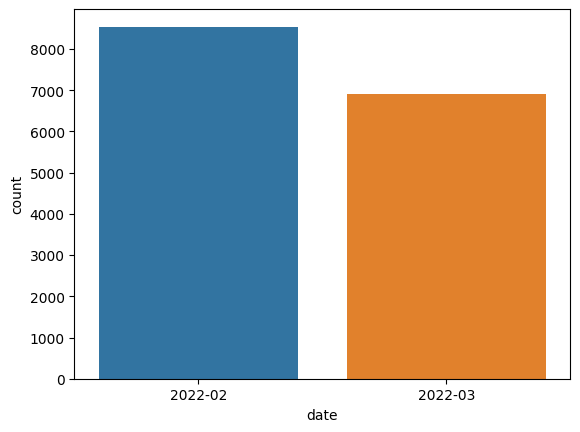

In [29]:
# 월별 결제 횟수 시각화하기
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Month')
plt.show()

In [32]:
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

AttributeError: ignored

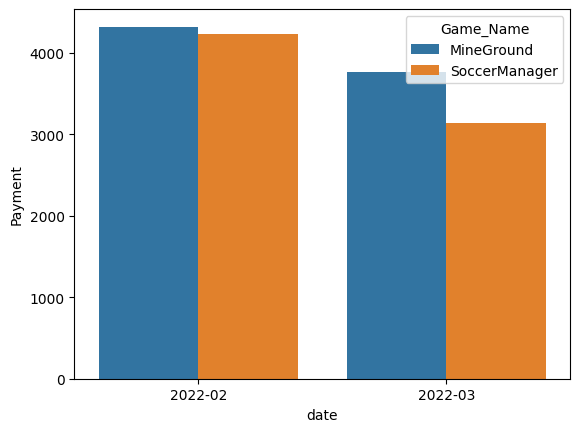

In [33]:
# 각 게임별 결제 건수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [35]:
grouped = temp_data['Payment'].groupby([temp_data['date'],temp_data['Game_Name']]).sum()
grouped

date     Game_Name    
2022-02  MineGround       42114200
         SoccerManager    38727600
2022-03  MineGround       38722800
         SoccerManager    29638400
Name: Payment, dtype: int64

AttributeError: ignored

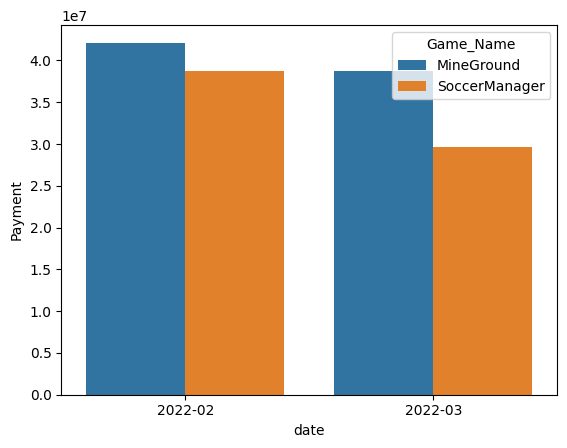

In [36]:
# 각 게임별 결제 금액 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Game')
plt.show()

In [37]:
player_data = sales_data[sales_data['Status']=='play']
player_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


In [38]:
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]

<ipython-input-38-7c6e99a93db7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['install_date'] = player_data['install'].str[:7]
<ipython-input-38-7c6e99a93db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['play_date'] = player_data['Time_stamp'].str[:7]


In [39]:
player_data['type'] = np.where(player_data['install_date']==player_data['play_date'],'New Player', 'Existing')

<ipython-input-39-19e4b62697b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['type'] = np.where(player_data['install_date']==player_data['play_date'],'New Player', 'Existing')


In [43]:
grouped = player_data['Status'].groupby([player_data['type'],player_data['play_date']]).count()
grouped

type        play_date
Existing    2022-02      28668
            2022-03      28207
New Player  2022-02      15480
            2022-03      12466
Name: Status, dtype: int64

AttributeError: ignored

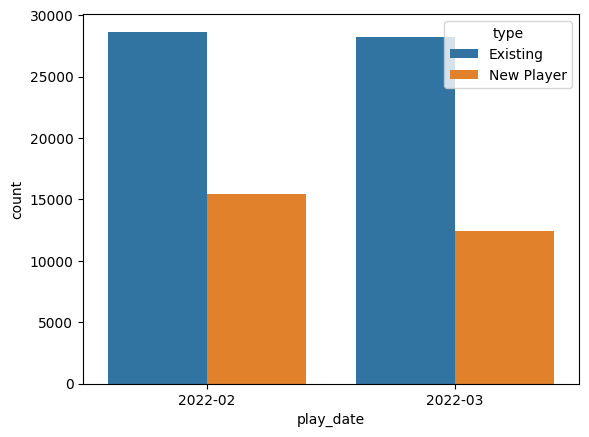

In [44]:
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Type By Month')
plt.show()

In [46]:
player_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date,type
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02,2022-01,2022-02,Existing
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02,2022-01,2022-02,Existing
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02,2022-01,2022-02,Existing
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02,2022-01,2022-02,Existing
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02,2022-01,2022-02,Existing


In [48]:
#월별 신규고객
player_data[player_data['type']=='New Player'].groupby(player_data['play_date']).count()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date,type
play_date,,,,,,,,,,
2022-02,15480,15480,15480,15480,15480,15480,15480,15480,15480,15480
2022-03,12466,12466,12466,12466,12466,12466,12466,12466,12466,12466


In [50]:
grouped = player_data['Payment'].groupby([player_data['type'],player_data['play_date']]).sum()
grouped

type        play_date
Existing    2022-02      50140500
            2022-03      50140500
New Player  2022-02      30701300
            2022-03      18220700
Name: Payment, dtype: int64

In [53]:
payment_data = player_data.set_index('type',drop=True)
payment_data.index

Index(['Existing', 'Existing', 'Existing', 'Existing', 'Existing', 'Existing',
       'Existing', 'Existing', 'Existing', 'Existing',
       ...
       'New Player', 'New Player', 'New Player', 'New Player', 'New Player',
       'New Player', 'New Player', 'New Player', 'New Player', 'New Player'],
      dtype='object', name='type', length=84821)

In [56]:
payment_data.drop('Existing',inplace=True)


KeyError: ignored

In [57]:
payment_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date,install_date,play_date
type,,,,,,,,,
New Player,2022-02-06,2022-02-11,MineGround,play,9900,dolorum016,2022-02,2022-02,2022-02
New Player,2022-02-16,2022-02-17,MineGround,play,49900,qui798,2022-02,2022-02,2022-02
New Player,2022-02-07,2022-02-08,MineGround,play,900,nesciunt993,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-08,MineGround,play,900,ratione752,2022-02,2022-02,2022-02
New Player,2022-02-03,2022-02-06,MineGround,play,900,ullam478,2022-02,2022-02,2022-02


In [58]:
payment_data = payment_data.set_index('Payment')

In [59]:
payment_data.head()

,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date,play_date
Payment,,,,,,,,
9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02


In [60]:
payment_data.drop(0,inplace=True)


In [61]:
payment_data.index

Int64Index([ 9900, 49900,   900,   900,   900,  9900,   900,  9900,  9900,
              900,
            ...
            29900, 29900, 19900,  9900, 19900,  9900,  9900,   900,  4900,
             4900],
           dtype='int64', name='Payment', length=5040)

In [62]:
payment_data.reset_index()

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date,play_date
0,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
1,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
2,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
3,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
4,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02
...,...,...,...,...,...,...,...,...,...
5035,9900,2022-03-21,2022-03-25,SoccerManager,play,a329,2022-03,2022-03,2022-03
5036,9900,2022-03-18,2022-03-20,SoccerManager,play,dignissimos737,2022-03,2022-03,2022-03
5037,900,2022-03-17,2022-03-20,SoccerManager,play,sequi289,2022-03,2022-03,2022-03
5038,4900,2022-03-13,2022-03-16,SoccerManager,play,delectus499,2022-03,2022-03,2022-03


In [64]:
payment_data = payment_data.reset_index()

In [65]:
payment_data

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date,play_date
0,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02,2022-02
1,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02,2022-02
2,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02,2022-02
3,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02,2022-02
4,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02,2022-02
...,...,...,...,...,...,...,...,...,...
5035,9900,2022-03-21,2022-03-25,SoccerManager,play,a329,2022-03,2022-03,2022-03
5036,9900,2022-03-18,2022-03-20,SoccerManager,play,dignissimos737,2022-03,2022-03,2022-03
5037,900,2022-03-17,2022-03-20,SoccerManager,play,sequi289,2022-03,2022-03,2022-03
5038,4900,2022-03-13,2022-03-16,SoccerManager,play,delectus499,2022-03,2022-03,2022-03


In [68]:
payment_data.set_index('play_date')

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date
play_date,,,,,,,,
2022-02,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02
2022-02,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02
2022-02,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02
2022-02,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02
2022-02,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02
...,...,...,...,...,...,...,...,...
2022-03,9900,2022-03-21,2022-03-25,SoccerManager,play,a329,2022-03,2022-03
2022-03,9900,2022-03-18,2022-03-20,SoccerManager,play,dignissimos737,2022-03,2022-03
2022-03,900,2022-03-17,2022-03-20,SoccerManager,play,sequi289,2022-03,2022-03


In [71]:
payment_data.set_index('play_date').loc['2022-02']

,Payment,install,Time_stamp,Game_Name,Status,Customer_ID,date,install_date
play_date,,,,,,,,
2022-02,9900,2022-02-06,2022-02-11,MineGround,play,dolorum016,2022-02,2022-02
2022-02,49900,2022-02-16,2022-02-17,MineGround,play,qui798,2022-02,2022-02
2022-02,900,2022-02-07,2022-02-08,MineGround,play,nesciunt993,2022-02,2022-02
2022-02,900,2022-02-03,2022-02-08,MineGround,play,ratione752,2022-02,2022-02
2022-02,900,2022-02-03,2022-02-06,MineGround,play,ullam478,2022-02,2022-02
...,...,...,...,...,...,...,...,...
2022-02,4900,2022-02-12,2022-02-14,SoccerManager,play,quam946,2022-02,2022-02
2022-02,4900,2022-02-10,2022-02-14,SoccerManager,play,commodi507,2022-02,2022-02
2022-02,900,2022-02-16,2022-02-21,SoccerManager,play,rerum275,2022-02,2022-02


In [72]:
payment_data.set_index('play_date').loc['2022-02'].Payment

play_date
2022-02     9900
2022-02    49900
2022-02      900
2022-02      900
2022-02      900
           ...  
2022-02     4900
2022-02     4900
2022-02      900
2022-02     9900
2022-02     4900
Name: Payment, Length: 3177, dtype: int64

In [75]:
payment_data.set_index('play_date').loc['2022-02'].Payment.values

array([ 9900, 49900,   900, ...,   900,  9900,  4900])

In [79]:
payment_data_02 = payment_data.set_index('play_date').loc['2022-02'].Payment.values
payment_data_03 = payment_data.set_index('play_date').loc['2022-03'].Payment.values

total_payment = np.array([payment_data_02,payment_data_03],dtype=object,)

2

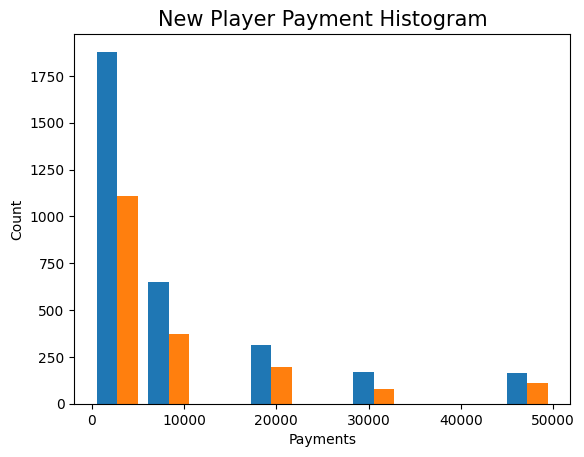

In [80]:
bins = np.linspace(0, 50000, 10) # 0에서 시작해서 50,000까지 10의 간격으로 x축을 설정합니다.
plt.xlabel("Payments")
plt.ylabel("Count")
plt.hist(total_payment, bins, label=['2022-02', '2022-03'])
plt.title("New Player Payment Histogram", fontsize=15)
plt.show()

In [82]:
play_data.set_index('type')

NameError: ignored